# Moments

> In mathematics, a moment is a specific quantitative measure, used in both mechanics and statistics, of the shape of a set of points.

https://en.wikipedia.org/wiki/Moment_(mathematics)



If the points represent mass:
- the zeroth moment is the total mass
- the first moment divided by the total mass is the center of mass
- the second moment is the rotational inertia

If the points represent probability density:

- the zeroth moment is the total probability (i.e. one)
- the first moment is the mean
- the second central moment is the variance
- the third central moment is the skewness
- the fourth central moment (with normalization and shift) is the kurtosis.

### Continuous Probability

The $k$-th moment of a real-valued continuous function, a **probability density function**, $f(x)$ of a real variable about a value $c$ is

$$\mu_k = \int_{-\infty}^\infty (x - c)^k\,f(x)\,\mathrm{d}x$$

### Discrete Probabilty

The $k$-th moment of a real-valued discrete function, a **probability mass function**,  $p(x)$ of a real variable about a value $c$ is

$$\mu_k = \sum (x - c)^kp(x)$$

# Simple Case: the Mean

Consider the first moment for a discrete valued probabilty where each value has an equal chance of being observed.

Then, for a list of $n$ values

$$\mathcal{D} = \{x_1, \dots, x_n\}$$

each with probabilty $p(x_k)= \frac{1}{n}$

Then 

$$\mu_1 = \sum (x)^1p(x)= \sum x\frac{1}{n} = \frac{1}{n}\sum x$$

This is the well-known mean you are used to. We typically refer to it simply as $\mu$

$$\mu = \frac{1}{n}\sum x$$

We also call this an **Expected Value**, $\mathbb{E}[x]$, and for the common case

$$\operatorname{E}[x] = \mu$$

In python:

In [1]:
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
n = 20
D = np.random.randint(1,20,n)
D

array([13, 18, 16, 11,  2, 19,  7,  8,  5,  7, 17,  8,  3, 13,  3,  1, 12,
       12,  4, 16])

In [3]:
mu = 1/(n)*np.sum(D)
mu

9.75

In [4]:
D.mean()

9.75

# Simple Case: the Variance

Consider the second **central** moment for a discrete valued probabilty where each value has an equal chance of being observed. We call it **central** because we will center this value around the mean.

Then 

$$\mu_2 = \sum (x - \mu)^2p(x)= \frac{1}{n}\sum (x - \mu)^2$$

This is just the expected value of $(x-\mu)^2$. We call this the **variance**, denoted $\sigma^2$.

$$\sigma^2 = \mathbb{E}\left[(x-\mu)^2\right]$$

In python:

In [5]:
var = 1/n*np.sum((D-mu)**2)
var

31.087500000000002

In [6]:
D.var()

31.087499999999999

Note that the square root of the variance is the standard deviation.

In [7]:
np.sqrt(var)

5.5756165578346586

In [8]:
D.std()

5.5756165578346577

## Advanced Cases: Skew and Kurtosis

### Skewness

In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. 

https://en.wikipedia.org/wiki/Skewness

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/892px-Negative_and_positive_skew_diagrams_%28English%29.svg.png" width=400px>

Skewness is the third **standardized** moment. 

$$\gamma = \operatorname{E}\left[\left(\frac{X-\mu}{\sigma}\right)^3 \right]$$

In python:

In [26]:
skew = 1/n*np.sum(((D-mu)/np.sqrt(var))**3)
skew

0.80390368055225281

In [27]:
import scipy.stats as st

In [28]:
st.skew(D)

0.803903680552253

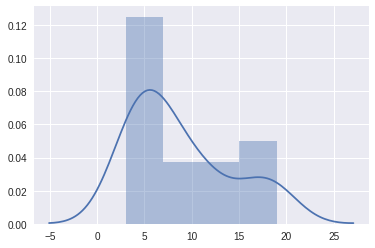

In [29]:
sns.distplot(D);

### Kurtosis

In probability theory and statistics, kurtosis (from Greek: κυρτός, kyrtos or kurtos, meaning "curved, arching") is a measure of the "tailedness" of the probability distribution of a real-valued random variable. In a similar way to the concept of skewness, kurtosis is a descriptor of the shape of a probability distribution and, just as for skewness, there are different ways of quantifying it for a theoretical distribution and corresponding ways of estimating it from a sample from a population.

https://en.wikipedia.org/wiki/Kurtosis

Kurtosis is the fourth **standardized** moment. 

$$\gamma = \operatorname{E}\left[\left(\frac{X-\mu}{\sigma}\right)^4 \right]$$

In python:

In [30]:
kurt = 1/n*np.sum(((D-mu)/np.sqrt(var))**4)
kurt

2.3470726180206687

In [31]:
st.kurtosis(D, fisher=False)

2.3470726180206682

# Describing a Distribution

Using these four values, we can describe the distribution of data.

mu: 9.7, var: 30.610000000000003, skew: 0.1557449378409463, kurt: 1.772105807632906


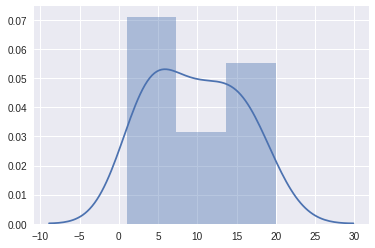

In [32]:
n = 20
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 10.665, var: 32.962775, skew: -0.015956763079531616, kurt: 1.7095667106736305


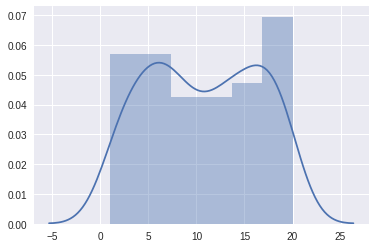

In [33]:
n = 200
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 10.379, var: 33.723358999999995, skew: 0.03428401081475027, kurt: 1.7751513946168997


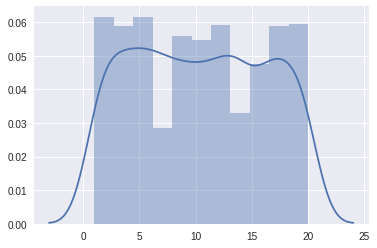

In [34]:
n = 2000
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 10.5212, var: 33.08895056, skew: -0.0002478059746130701, kurt: 1.8038442635309626


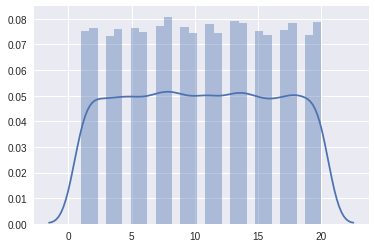

In [35]:
n = 20000
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 10.489425, var: 33.145788169375, skew: 0.0016033143007001215, kurt: 1.7945858492001987


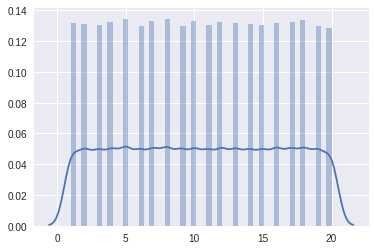

In [36]:
n = 200000
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 10.4985955, var: 33.23819602737974, skew: -0.000588127569074273, kurt: 1.794844531204431


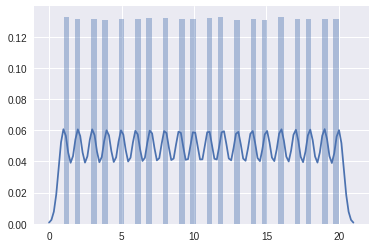

In [37]:
n = 2000000
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

#### `randint` draws from a uniform distribution

    np.random.randint()

    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).

### What about `randn`?

In [38]:
D

array([19, 10,  8, ..., 19,  2,  6])

mu: -0.18049566720187485, var: 0.9706086626592848, skew: 0.45147576549857366, kurt: 2.280586420874367


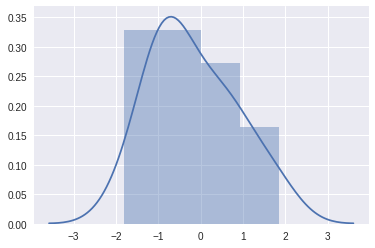

In [39]:
n = 20
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)

mu: 0.03246090763544067, var: 0.8287888191861903, skew: -0.019482900753713547, kurt: 3.134949278526131


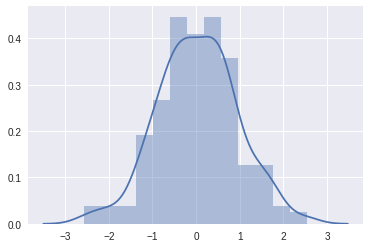

In [40]:
n = 200
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)

mu: 0.0022600701162281316, var: 0.9874292959994855, skew: -0.0007334316025433806, kurt: 2.9511621884416055


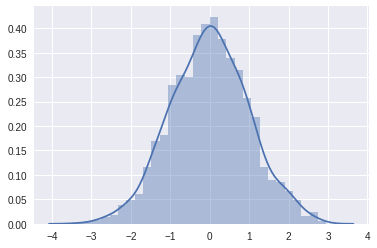

In [41]:
n = 2000
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)

mu: -0.0006448349605680356, var: 0.9827144843793951, skew: 0.03478642285969108, kurt: 3.071132817283175


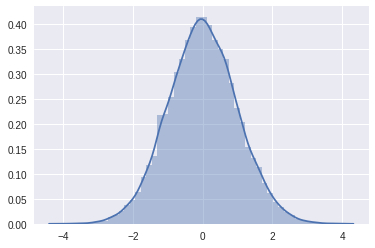

In [42]:
n = 20000
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)

mu: 0.000684970732959392, var: 1.0067501306217732, skew: -0.0049940109637989965, kurt: 2.9920535828188073


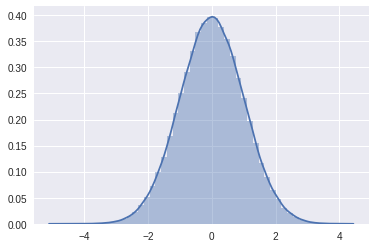

In [43]:
n = 200000
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)